##Imports

In [ ]:
import os
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification, AutoConfig
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import json
from sklearn.model_selection import train_test_split
from torch.optim import AdamW
import torch.nn.functional as F
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
from transformers import get_linear_schedule_with_warmup
import warnings


## Sentiment Analysis

Para esta tarea, se cargan los archivos, se reutilizan los embeddings de E3, ya que estan hechos con el mismo modelo y se hace fine-tuning al modelo, para luego entrenarlo y evaluarlo.

Mounted at /content/drive
Usando dispositivo: cuda
Buscando embeddings en: /content/drive/Shareddrives/NLP/Entrega3/models/bert_finetuned.pth

Cargando configuración y tokenizer...


config.json:   0%|          | 0.00/650 [00:00<?, ?B/s]

 Tokenizer cargado desde carpeta guardada

Cargando label map...
 Label map cargado: {'positivo': 2, 'negativo': 0, 'neutro': 1}
  Número de clases: 3

CARGA Y PREPARACIÓN DE DATOS
Cargando dataset desde: /content/drive/Shareddrives/NLP/Entrega3/dataset_sentimientos_normalizados.csv
✓ Dataset cargado: 13373 filas

División de datos:
  Entrenamiento: 9232
  Validación: 1978
  Prueba: 1979

CREANDO MODELO CON ATENCIÓN


pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Cargando embeddings fine-tuned desde: /content/drive/Shareddrives/NLP/Entrega3/models/bert_finetuned.pth


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

 Embeddings cargados exitosamente

Modelo con atención: True
Dropout rate: 0.3
 Modelo creado y movido a cuda

ENTRENAMIENTO OPTIMIZADO

 DataLoaders creados (batch_size=16)

Calculando class weights balanceados...
Distribución de clases:
  negativo: 2204 muestras (23.9%)
  neutro: 6298 muestras (68.2%)
  positivo: 730 muestras (7.9%)

Class weights (sqrt):
  negativo: 0.3004
  neutro: 0.1777
  positivo: 0.5219

Configurando optimizador:
  Learning rate: 2e-5
  Weight decay: 0.01

COMIENZO DEL ENTRENAMIENTO

Epoch 1/10

Resultados epoch 1:
   Entrenamiento:
     Loss: 1.1299 (↓)
     Accuracy: 0.6153 (↑)
   Validación:
     Loss: 0.7821 (↓)
     Accuracy: 0.7417 (↑)
   Learning Rate: 2.00e-05
 ¡Nuevo mejor modelo guardado!

Epoch 2/10

Resultados epoch 2:
   Entrenamiento:
     Loss: 0.7776 (↓)
     Accuracy: 0.7254 (↑)
   Validación:
     Loss: 0.7995 (↑)
     Accuracy: 0.6921 (↓)
   Learning Rate: 1.78e-05
 Early stopping: 1/5

Epoch 3/10

Resultados epoch 3:
   Entrenamiento:
     L

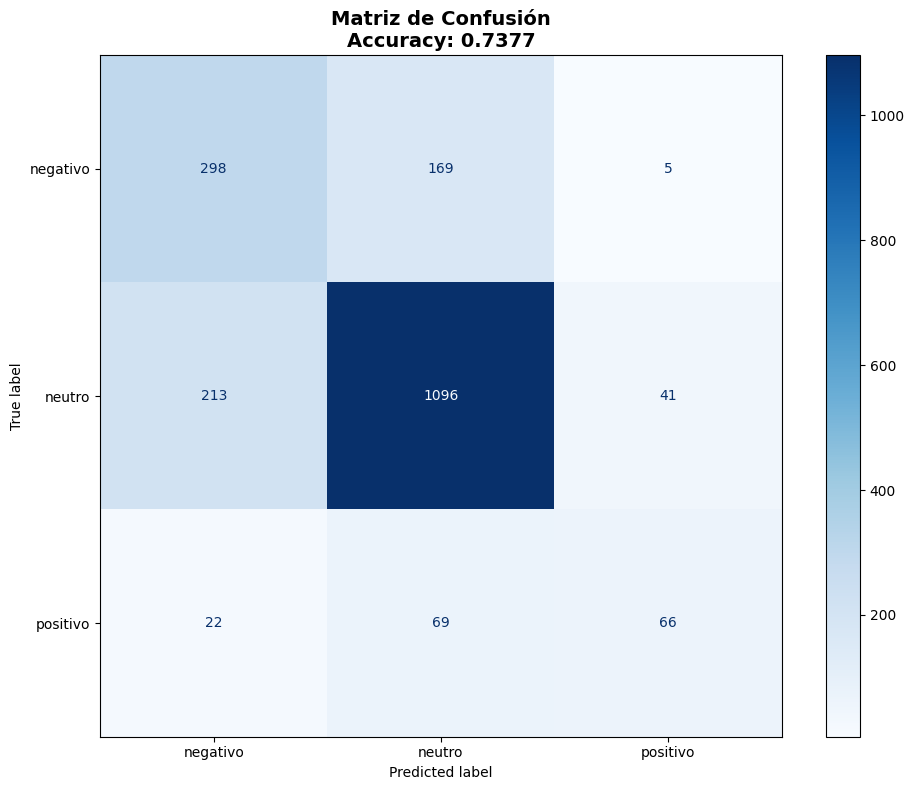


 Modelo guardado en: /content/drive/Shareddrives/NLP/Entrega4/models_optimized

VISUALIZACIÓN DE ATENCIÓN

Visualizando atención para ejemplos:

Ejemplo 1: 'Me encanta este producto, es excelente y de alta calidad'
Predicción: positivo
Probabilidades: {'negativo': 0.0046011717058718204, 'neutro': 0.06544766575098038, 'positivo': 0.9299511909484863}


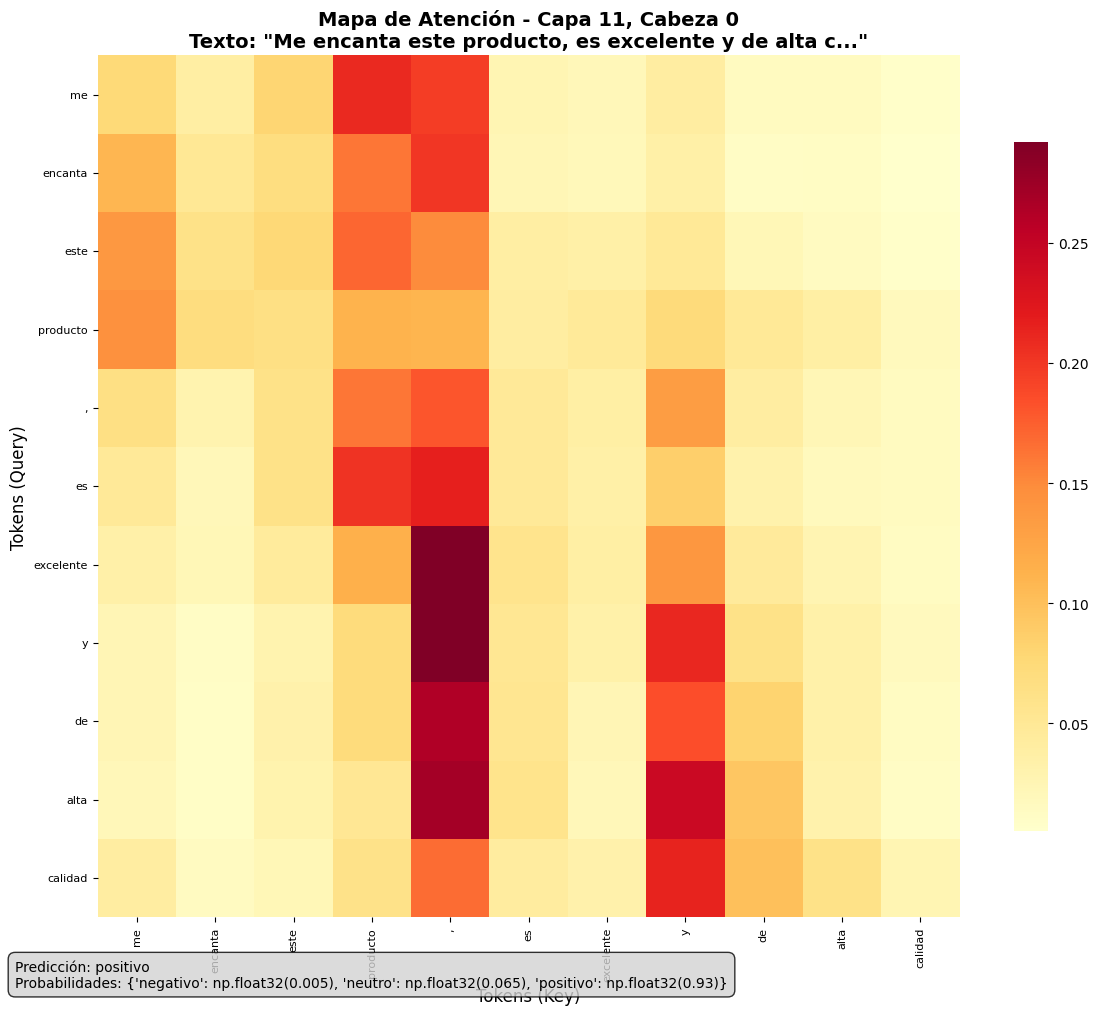


Atención promedio por token:
  'me': 0.088
  'encanta': 0.039
  'este': 0.057
  'producto': 0.122
  ',': 0.173
  'es': 0.040
  'excelente': 0.032
  'y': 0.110
  'de': 0.041
  'alta': 0.025

Ejemplo 2: 'No me gustó nada, es una completa decepción'
Predicción: negativo
Probabilidades: {'negativo': 0.49562689661979675, 'neutro': 0.32315048575401306, 'positivo': 0.18122266232967377}


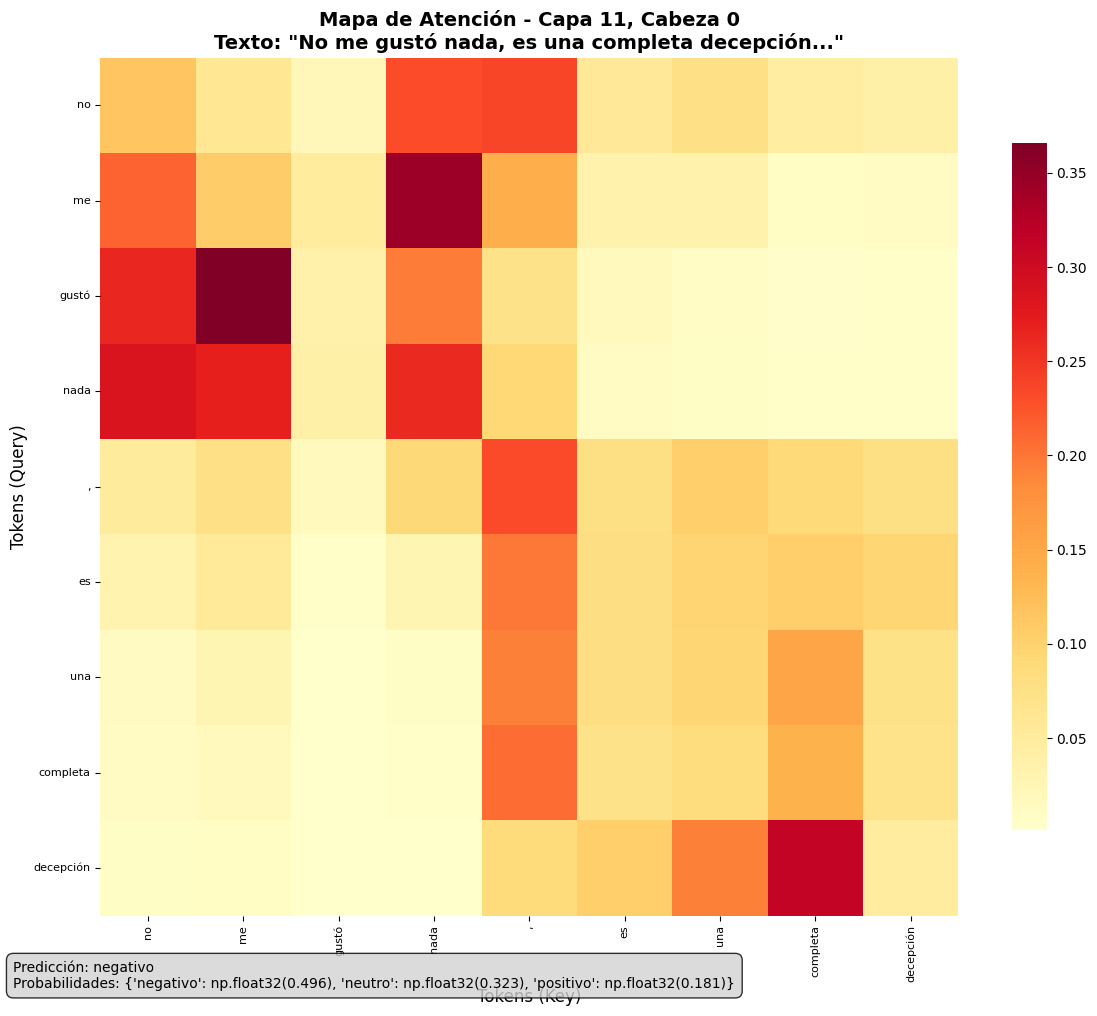


Atención promedio por token:
  'no': 0.068
  'me': 0.080
  'gustó': 0.016
  'nada': 0.057
  ',': 0.128
  'es': 0.057
  'una': 0.108
  'completa': 0.127
  'decepción': 0.089

FUNCIONES DISPONIBLES

Funciones principales:
1. predict_with_attention(text, return_attention=False)
   - Predice sentimiento con opción de obtener pesos de atención

2. visualize_attention(text, layer=11, head=0)
   - Visualiza mapa de calor de atención

3. batch_predict_with_attention(texts, batch_size=8, return_attention=False)
   - Predicción por lotes con atención

Ejemplos de uso:
>>> texto = "El producto es excelente, muy recomendable"
>>> sentimiento, probabilidades = predict_with_attention(texto)
>>> print(f"Sentimiento: {sentimiento}")
>>> print(f"Probabilidades: {probabilidades}")

>>> # Para obtener pesos de atención
>>> sentimiento, probs, att_weights = predict_with_attention(texto, return_attention=True)
>>> # att_weights contiene los pesos de atención de todas las capas y cabezas


¡MODELO CON ATEN

In [ ]:

warnings.filterwarnings('ignore')

drive.mount('/content/drive')

# Configuración
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Usando dispositivo: {device}")

# Configuración de rutas
MODELS_DIR = "/content/drive/Shareddrives/NLP/Entrega3/models"
EMBEDDINGS_PATH = os.path.join(MODELS_DIR, "bert_finetuned.pth")
print(f"Buscando embeddings en: {EMBEDDINGS_PATH}")

# Verificar archivos
if not os.path.exists(EMBEDDINGS_PATH):
    print(f" Error: No se encontraron embeddings en {EMBEDDINGS_PATH}")
    print("Archivos disponibles:")
    for file in os.listdir(MODELS_DIR):
        print(f"  - {file}")
    raise FileNotFoundError(f"No se encontró el archivo de embeddings: {EMBEDDINGS_PATH}")

# 1. Cargar configuración y tokenizer
print("\nCargando configuración y tokenizer...")
BERT_MODEL = "dccuchile/bert-base-spanish-wwm-uncased"
config = AutoConfig.from_pretrained(BERT_MODEL)

try:
    tokenizer = AutoTokenizer.from_pretrained(MODELS_DIR)
    print(" Tokenizer cargado desde carpeta guardada")
except:
    tokenizer = AutoTokenizer.from_pretrained(BERT_MODEL)
    print(" Tokenizer cargado desde Hugging Face")

# 2. Cargar label map
print("\nCargando label map...")
label_map_path = os.path.join(MODELS_DIR, "label_map.json")
if os.path.exists(label_map_path):
    with open(label_map_path, 'r') as f:
        label_map = json.load(f)
    inverse_label_map = {v: k for k, v in label_map.items()}
    NUM_CLASSES = len(inverse_label_map)
    print(f" Label map cargado: {label_map}")
    print(f"  Número de clases: {NUM_CLASSES}")
else:
    print(" No se encontró label_map.json, usando 3 clases por defecto")
    NUM_CLASSES = 3
    inverse_label_map = {0: 'negativo', 1: 'neutro', 2: 'positivo'}

# 3. Cargar DATOS para fine-tuning
print("\n" + "="*50)
print("CARGA Y PREPARACIÓN DE DATOS")
print("="*50)

# Ruta a tu dataset
DATASET_PATH = "/content/drive/Shareddrives/NLP/Entrega3/dataset_sentimientos_normalizados.csv"

if os.path.exists(DATASET_PATH):
    print(f"Cargando dataset desde: {DATASET_PATH}")
    df = pd.read_csv(DATASET_PATH, encoding='utf-8')
    print(f"✓ Dataset cargado: {len(df)} filas")

    # Preparar datos
    df = df.dropna(subset=['text', 'sentimiento_normalizado'])
    df['sentimiento_normalizado'] = df['sentimiento_normalizado'].astype(str).str.strip().str.lower()

    # Aplicar label map si existe, si no crear uno
    if os.path.exists(label_map_path):
        df['label'] = df['sentimiento_normalizado'].map(label_map)
        # Llenar NaN con valor por defecto (neutro=1)
        df['label'] = df['label'].fillna(1)
    else:
        # Crear label map dinámicamente
        print("Creando label map dinámicamente...")
        label_map = {}
        for sentiment in df['sentimiento_normalizado'].unique():
            sentiment_lower = sentiment.lower()
            if 'negativo' in sentiment_lower:
                label_map[sentiment] = 0
            elif 'positivo' in sentiment_lower:
                label_map[sentiment] = 2
            else:  # neutro o cualquier otro
                label_map[sentiment] = 1

        df['label'] = df['sentimiento_normalizado'].map(label_map)
        NUM_CLASSES = len(df['label'].unique())
        inverse_label_map = {v: k for k, v in label_map.items()}
        print(f"Label map creado: {label_map}")

    # Dividir datos
    train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['label'])
    val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['label'])

    print(f"\nDivisión de datos:")
    print(f"  Entrenamiento: {len(train_df)}")
    print(f"  Validación: {len(val_df)}")
    print(f"  Prueba: {len(test_df)}")

else:
    print(" No se encontró dataset. Solo se puede usar para inferencia, no para fine-tuning.")
    train_df, val_df, test_df = None, None, None

# 4. Definir Dataset
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts.reset_index(drop=True)
        self.labels = labels.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts.iloc[idx])
        label = int(self.labels.iloc[idx])

        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

# 5. Modelo con MECANISMO DE ATENCIÓN ADICIONAL
class BERTWithAttention(nn.Module):
    def __init__(self, bert_model_name, num_classes, embeddings_path, dropout_rate=0.3, use_attention=True):
        super(BERTWithAttention, self).__init__()

        self.use_attention = use_attention

        # Cargar el modelo BERT base
        self.bert = AutoModel.from_pretrained(bert_model_name, output_attentions=True)

        # CARGAR LOS EMBEDDINGS FINE-TUNED
        print(f"\nCargando embeddings fine-tuned desde: {embeddings_path}")
        try:
            loaded_state_dict = torch.load(embeddings_path, map_location='cpu')

            # Extraer pesos del BERT
            bert_state_dict = {}
            for key, value in loaded_state_dict.items():
                if key.startswith('bert.'):
                    bert_state_dict[key] = value

            if bert_state_dict:
                missing_keys, unexpected_keys = self.bert.load_state_dict(
                    bert_state_dict, strict=False
                )
                print(f" Embeddings cargados exitosamente")
            else:
                print(" Usando BERT base sin fine-tuning")

        except Exception as e:
            print(f" Error al cargar embeddings: {e}")
            print("  Usando BERT base sin fine-tuning")

        # MECANISMO DE ATENCIÓN ADICIONAL
        if use_attention:
            hidden_size = self.bert.config.hidden_size
            self.attention = nn.MultiheadAttention(
                embed_dim=hidden_size,
                num_heads=8,
                dropout=0.1,
                batch_first=True
            )
            self.attention_norm = nn.LayerNorm(hidden_size)
            self.attention_dropout = nn.Dropout(0.1)

        # Capas de clasificación
        self.dropout = nn.Dropout(dropout_rate)
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_classes)

        # Inicialización de pesos para el clasificador
        nn.init.xavier_uniform_(self.classifier.weight)
        nn.init.zeros_(self.classifier.bias)

        print(f"\nModelo con atención: {use_attention}")
        print(f"Dropout rate: {dropout_rate}")

    def forward(self, input_ids, attention_mask, return_attention=False):
        # Obtener salidas del BERT (incluyendo pesos de atención)
        outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            output_attentions=True  # Para obtener pesos de atención
        )

        # Obtener los embeddings de la última capa
        last_hidden_state = outputs.last_hidden_state  # [batch_size, seq_len, hidden_size]

        # Obtener pesos de atención del BERT
        bert_attentions = outputs.attentions  # Lista de [batch_size, num_heads, seq_len, seq_len]

        # Usar atención adicional si está configurado
        if self.use_attention:
            # Aplicar atención adicional
            attn_output, attn_weights = self.attention(
                query=last_hidden_state,
                key=last_hidden_state,
                value=last_hidden_state,
                key_padding_mask=(attention_mask == 0)
            )

            # Residual connection + layer norm
            attn_output = self.attention_dropout(attn_output)
            attn_output = self.attention_norm(last_hidden_state + attn_output)

            # Usar el primer token [CLS] para clasificación
            pooled_output = attn_output[:, 0, :]  # [batch_size, hidden_size]
        else:
            # Usar el output del pooler (como antes)
            pooled_output = outputs.pooler_output

        # Clasificación
        output = self.dropout(pooled_output)
        logits = self.classifier(output)

        if return_attention:
            return logits, bert_attentions
        else:
            return logits

# 6. Crear el modelo
print("\n" + "="*50)
print("CREANDO MODELO CON ATENCIÓN")
print("="*50)

model = BERTWithAttention(
    bert_model_name=BERT_MODEL,
    num_classes=NUM_CLASSES,
    embeddings_path=EMBEDDINGS_PATH,
    dropout_rate=0.3,  # Reducido de 0.5
    use_attention=True
)

model.to(device)
print(f" Modelo creado y movido a {device}")

# 7. Función para visualizar atención
def visualize_attention(text, tokenizer, model, device, layer=11, head=0):
    """Visualiza los pesos de atención para un texto dado"""
    model.eval()

    # Tokenizar el texto
    encoding = tokenizer(
        text,
        truncation=True,
        padding='max_length',
        max_length=128,
        return_tensors='pt'
    )

    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    # Obtener predicción y pesos de atención
    with torch.no_grad():
        logits, attentions = model(input_ids, attention_mask, return_attention=True)
        probabilities = torch.softmax(logits, dim=1)
        predicted_class = torch.argmax(logits, dim=1).item()

    # Obtener tokens para visualización
    tokens = tokenizer.convert_ids_to_tokens(input_ids[0])

    # Obtener pesos de atención de la capa y cabeza especificada
    # attentions es una lista de [batch_size, num_heads, seq_len, seq_len]
    attention_weights = attentions[layer][0, head].cpu().numpy()

    # Filtrar tokens especiales y máscara
    valid_indices = [i for i, token in enumerate(tokens)
                    if token not in ['[PAD]', '[CLS]', '[SEP]']
                    and attention_mask[0, i].item() == 1]

    valid_tokens = [tokens[i] for i in valid_indices]
    valid_attention = attention_weights[valid_indices][:, valid_indices]

    # Visualizar
    plt.figure(figsize=(12, 10))
    ax = sns.heatmap(
        valid_attention,
        xticklabels=valid_tokens,
        yticklabels=valid_tokens,
        cmap='YlOrRd',
        square=True,
        cbar_kws={'shrink': 0.8}
    )

    plt.title(f'Mapa de Atención - Capa {layer}, Cabeza {head}\nTexto: "{text[:50]}..."',
              fontsize=14, fontweight='bold')
    plt.xlabel('Tokens (Key)', fontsize=12)
    plt.ylabel('Tokens (Query)', fontsize=12)
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks(rotation=0, fontsize=8)

    # Información adicional
    sentiment = inverse_label_map.get(predicted_class, f"clase_{predicted_class}")
    probs = probabilities[0].cpu().numpy()

    plt.figtext(0.02, 0.02,
                f"Predicción: {sentiment}\n" +
                f"Probabilidades: {dict(zip([inverse_label_map.get(i, f'clase_{i}') for i in range(NUM_CLASSES)], np.round(probs, 3)))}",
                fontsize=10,
                bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))

    plt.tight_layout()
    plt.show()

    return attention_weights, tokens

# 8. Funciones de entrenamiento
def train_epoch_balanced(model, loader, optimizer, criterion, scheduler, device):
    model.train()
    total_loss = 0
    all_preds = []
    all_labels = []

    for batch in loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()

        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        if scheduler is not None:
            scheduler.step()

        total_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    avg_loss = total_loss / len(loader)
    accuracy = accuracy_score(all_labels, all_preds)
    return avg_loss, accuracy

def evaluate(model, loader, criterion, device, return_predictions=False):
    model.eval()
    total_loss = 0
    all_preds = []
    all_labels = []
    all_probabilities = []

    with torch.no_grad():
        for batch in loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            loss = criterion(outputs, labels)

            total_loss += loss.item()

            probabilities = torch.softmax(outputs, dim=1)
            _, predicted = torch.max(outputs, 1)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probabilities.extend(probabilities.cpu().numpy())

    avg_loss = total_loss / len(loader)
    accuracy = accuracy_score(all_labels, all_preds)

    if return_predictions:
        return avg_loss, accuracy, all_preds, all_labels, all_probabilities
    else:
        return avg_loss, accuracy

# 9. Entrenamiento OPTIMIZADO
if train_df is not None:
    print("\n" + "="*50)
    print("ENTRENAMIENTO OPTIMIZADO")
    print("="*50)

    # Crear DataLoaders
    BATCH_SIZE = 16  # Reducido para mejor generalización

    train_dataset = SentimentDataset(train_df['text'], train_df['label'], tokenizer)
    val_dataset = SentimentDataset(val_df['text'], val_df['label'], tokenizer)
    test_dataset = SentimentDataset(test_df['text'], test_df['label'], tokenizer)

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

    print(f"\n DataLoaders creados (batch_size={BATCH_SIZE})")

    # Calcular class weights BALANCEADOS (usando sqrt para menos extremos)
    print("\nCalculando class weights balanceados...")
    class_counts = train_df['label'].value_counts().sort_index()
    print(f"Distribución de clases:")
    for label, count in class_counts.items():
        class_name = inverse_label_map.get(label, f'clase_{label}')
        percentage = count/len(train_df)*100
        print(f"  {class_name}: {count} muestras ({percentage:.1f}%)")

    # Class weights usando sqrt para menos extremos
    class_weights = np.sqrt(1.0 / class_counts)
    class_weights = class_weights / class_weights.sum()
    class_weights_tensor = torch.tensor(class_weights.values, dtype=torch.float).to(device)

    print(f"\nClass weights (sqrt):")
    for label, weight in class_weights.items():
        class_name = inverse_label_map.get(label, f'clase_{label}')
        print(f"  {class_name}: {weight:.4f}")

    # Optimizador optimizado
    print(f"\nConfigurando optimizador:")
    print(f"  Learning rate: 2e-5")
    print(f"  Weight decay: 0.01")

    optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)

    # Loss con pesos balanceados
    criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)

    # Scheduler más conservador
    EPOCHS = 10  # Más épocas
    total_steps = len(train_loader) * EPOCHS

    scheduler = get_linear_schedule_with_warmup(
        optimizer,
        num_warmup_steps=int(total_steps * 0.1),  # 10% warmup
        num_training_steps=total_steps
    )

    # Historial
    history = {
        'train_loss': [],
        'train_acc': [],
        'val_loss': [],
        'val_acc': [],
        'learning_rate': []
    }

    # Early stopping más tolerante
    best_val_loss = float('inf')
    best_val_acc = 0
    patience = 5
    patience_counter = 0

    save_dir = "/content/drive/Shareddrives/NLP/Entrega4/models_optimized"
    os.makedirs(save_dir, exist_ok=True)

    # Entrenamiento
    print("\n" + "="*50)
    print("COMIENZO DEL ENTRENAMIENTO")
    print("="*50)

    for epoch in range(EPOCHS):
        print(f"\n{'='*40}")
        print(f"Epoch {epoch+1}/{EPOCHS}")
        print(f"{'='*40}")

        # Entrenamiento
        train_loss, train_acc = train_epoch_balanced(
            model, train_loader, optimizer, criterion, scheduler, device
        )

        # Validación
        val_loss, val_acc = evaluate(model, val_loader, criterion, device)
        current_lr = scheduler.get_last_lr()[0]

        # Guardar historial
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        history['learning_rate'].append(current_lr)

        print(f"\nResultados epoch {epoch+1}:")
        print(f"   Entrenamiento:")
        print(f"     Loss: {train_loss:.4f} ({'↓' if epoch==0 or train_loss<history['train_loss'][-2] else '↑'})")
        print(f"     Accuracy: {train_acc:.4f} ({'↑' if epoch==0 or train_acc>history['train_acc'][-2] else '↓'})")
        print(f"   Validación:")
        print(f"     Loss: {val_loss:.4f} ({'↓' if epoch==0 or val_loss<history['val_loss'][-2] else '↑'})")
        print(f"     Accuracy: {val_acc:.4f} ({'↑' if epoch==0 or val_acc>history['val_acc'][-2] else '↓'})")
        print(f"   Learning Rate: {current_lr:.2e}")

        # Early stopping mejorado (considera tanto loss como accuracy)
        if val_loss < best_val_loss and val_acc > best_val_acc * 0.95:  # 95% del mejor accuracy
            best_val_loss = val_loss
            best_val_acc = val_acc
            patience_counter = 0

            # Guardar el mejor modelo
            torch.save(model.state_dict(), os.path.join(save_dir, "best_model.pth"))
            print(f" ¡Nuevo mejor modelo guardado!")
        else:
            patience_counter += 1
            print(f" Early stopping: {patience_counter}/{patience}")

            if patience_counter >= patience:
                print(f"\n{'='*40}")
                print(f" EARLY STOPPING ACTIVADO")
                print(f"{'='*40}")
                print(f"Mejor val_loss: {best_val_loss:.4f}")
                print(f"Mejor val_acc: {best_val_acc:.4f}")
                break

    # Cargar el mejor modelo
    print(f"\nCargando el mejor modelo guardado...")
    model.load_state_dict(torch.load(os.path.join(save_dir, "best_model.pth")))
    print(" Mejor modelo cargado")

    print("\n" + "="*50)
    print("EVALUACIÓN FINAL")
    print("="*50)

    # Evaluación
    test_loss, test_acc, test_preds, test_labels, test_probs = evaluate(
        model, test_loader, criterion, device, return_predictions=True
    )

    print(f"\n RESULTADOS FINALES:")
    print(f"  Test Loss: {test_loss:.4f}")
    print(f"  Test Accuracy: {test_acc:.4f}")
    print(f"  Mejor Val Loss: {best_val_loss:.4f}")
    print(f"  Mejor Val Accuracy: {best_val_acc:.4f}")

    # Reporte detallado
    target_names = [inverse_label_map.get(i, f'clase_{i}') for i in range(NUM_CLASSES)]

    print("\n REPORTE DE CLASIFICACIÓN:")
    report = classification_report(test_labels, test_preds, target_names=target_names, digits=4)
    print(report)

    # Matriz de confusión
    print("\n MATRIZ DE CONFUSIÓN:")
    cm = confusion_matrix(test_labels, test_preds)

    # Mostrar matriz mejorada
    try:
        plt.figure(figsize=(10, 8))
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
        disp.plot(cmap='Blues', ax=plt.gca(), values_format='d')
        plt.title(f'Matriz de Confusión\nAccuracy: {test_acc:.4f}', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
    except:
        print("\nMatriz numérica:")
        print(pd.DataFrame(cm, index=target_names, columns=target_names))

    # Guardar todo
    tokenizer.save_pretrained(save_dir)
    with open(os.path.join(save_dir, "label_map.json"), 'w') as f:
        json.dump(label_map, f)

    # Guardar historial
    history_df = pd.DataFrame(history)
    history_df.to_csv(os.path.join(save_dir, "training_history.csv"), index=False)

    print(f"\n Modelo guardado en: {save_dir}")

# 10. Funciones de predicción con atención
def predict_with_attention(text, model, tokenizer, device, return_attention=False):
    """Predice con opción de retornar pesos de atención"""
    model.eval()

    encoding = tokenizer(
        text,
        truncation=True,
        padding='max_length',
        max_length=128,
        return_tensors='pt'
    )

    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    with torch.no_grad():
        if return_attention:
            outputs, attentions = model(input_ids, attention_mask, return_attention=True)
        else:
            outputs = model(input_ids, attention_mask)

        probabilities = torch.softmax(outputs, dim=1)
        predicted_class = torch.argmax(outputs, dim=1).item()

    sentiment = inverse_label_map.get(predicted_class, f"clase_{predicted_class}")
    probs = probabilities[0].cpu().numpy()
    prob_dict = {inverse_label_map.get(i, f"clase_{i}"): float(probs[i])
                for i in range(len(probs))}

    if return_attention:
        return sentiment, prob_dict, attentions
    else:
        return sentiment, prob_dict

def batch_predict_with_attention(texts, batch_size=8, return_attention=False):
    """Predicción por lotes con atención"""
    model.eval()
    all_predictions = []
    all_probabilities = []
    all_attentions = [] if return_attention else None

    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]

        encoding = tokenizer(
            batch_texts,
            truncation=True,
            padding='max_length',
            max_length=128,
            return_tensors='pt'
        )

        input_ids = encoding['input_ids'].to(device)
        attention_mask = encoding['attention_mask'].to(device)

        with torch.no_grad():
            if return_attention:
                outputs, attentions = model(input_ids, attention_mask, return_attention=True)
                all_attentions.append(attentions)
            else:
                outputs = model(input_ids, attention_mask)

            probabilities = torch.softmax(outputs, dim=1)
            predicted_classes = torch.argmax(outputs, dim=1).cpu().numpy()

        for j, pred_class in enumerate(predicted_classes):
            sentiment = inverse_label_map.get(pred_class, f"clase_{pred_class}")
            probs = probabilities[j].cpu().numpy()
            prob_dict = {inverse_label_map.get(k, f"clase_{k}"): float(probs[k])
                        for k in range(len(probs))}

            all_predictions.append(sentiment)
            all_probabilities.append(prob_dict)

    if return_attention:
        return all_predictions, all_probabilities, all_attentions
    else:
        return all_predictions, all_probabilities

# 11. Probar con visualización de atención
print("\n" + "="*50)
print("VISUALIZACIÓN DE ATENCIÓN")
print("="*50)

# Ejemplos para visualizar
attention_texts = [
    "Me encanta este producto, es excelente y de alta calidad",
    "No me gustó nada, es una completa decepción",
    "Está bien, cumple con lo básico que se espera"
]

print("\nVisualizando atención para ejemplos:")
for i, text in enumerate(attention_texts[:2]):  # Solo primeros 2 para no saturar
    print(f"\nEjemplo {i+1}: '{text}'")

    # Obtener predicción
    sentiment, probs = predict_with_attention(text, model, tokenizer, device)

    print(f"Predicción: {sentiment}")
    print(f"Probabilidades: {probs}")

    # Visualizar atención
    try:
        attention_weights, tokens = visualize_attention(
            text, tokenizer, model, device, layer=11, head=0
        )

        # También mostrar atención promedio por token
        print("\nAtención promedio por token:")
        avg_attention = attention_weights.mean(axis=0)

        # Filtrar tokens válidos
        valid_indices = [i for i, token in enumerate(tokens)
                        if token not in ['[PAD]', '[CLS]', '[SEP]']]

        for idx in valid_indices[:10]:  # Mostrar primeros 10 tokens
            token_str = tokens[idx].replace('##', '')
            if token_str.strip():
                print(f"  '{token_str}': {avg_attention[idx]:.3f}")
    except Exception as e:
        print(f"Error en visualización: {e}")

# 12. Funciones finales
print("\n" + "="*50)
print("FUNCIONES DISPONIBLES")
print("="*50)

print("""
Funciones principales:
1. predict_with_attention(text, return_attention=False)
   - Predice sentimiento con opción de obtener pesos de atención

2. visualize_attention(text, layer=11, head=0)
   - Visualiza mapa de calor de atención

3. batch_predict_with_attention(texts, batch_size=8, return_attention=False)
   - Predicción por lotes con atención

Ejemplos de uso:
>>> texto = "El producto es excelente, muy recomendable"
>>> sentimiento, probabilidades = predict_with_attention(texto)
>>> print(f"Sentimiento: {sentimiento}")
>>> print(f"Probabilidades: {probabilidades}")

>>> # Para obtener pesos de atención
>>> sentimiento, probs, att_weights = predict_with_attention(texto, return_attention=True)
>>> # att_weights contiene los pesos de atención de todas las capas y cabezas
""")

print("\n" + "="*50)
print("¡MODELO CON ATENCIÓN LISTO! ")
print("="*50)